# Классификация с помощью Keras

Качество лучшей модели: ~0.94

## Импорты библиотек

In [1270]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras import Input
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model

## Загрузка и подготовка данных

In [1271]:
bank_data = pd.read_csv("../data/bank_churners_preprocessed.csv")
bank_data.head()

Unnamed: 0  Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
0           0               0            45                3                2   
1           1               0            49                5                5   
2           2               0            51                3                5   
3           3               0            40                4                2   
4           4               0            40                3                1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                3              0              39                         5   
1                1              0              44                         6   
2                4              0              36                         4   
3                1              0              34                         3   
4                3              0              21                         5   

   Months_Inactive_12_mon  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                       1  ...             1144              42   
1                       1  ...             1291              33   
2                       1  ...             1887              20   
3                       4  ...             1171              20   
4                       1  ...              816              28   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  c_F  c_M  c_Divorced  \
0                1.625                  0.061    0    1           0   
1                3.714                  0.105    1    0           0   
2                2.333                  0.000    0    1           0   
3                2.333                  0.760    1    0           0   
4                2.500                  0.000    0    1           0   

   c_Married  c_Single  c_Unknown  
0          1         0          0  
1          0         1          0  
2          1         0          0  
3          0         0          1  
4          1         0          0  

[5 rows x 25 columns]

In [1272]:
bank_data.tail()

Unnamed: 0  Attrition_Flag  Customer_Age  Dependent_count  \
10122       10122               0            50                2   
10123       10123               1            41                2   
10124       10124               1            44                1   
10125       10125               1            30                2   
10126       10126               1            43                2   

       Education_Level  Income_Category  Card_Category  Months_on_book  \
10122                5                2              0              40   
10123                0                2              0              25   
10124                2                1              0              36   
10125                5                2              0              36   
10126                5                1              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  ...  Total_Trans_Amt  \
10122                         3                       2  ...            15476   
10123                         4                       2  ...             8764   
10124                         5                       3  ...            10291   
10125                         4                       3  ...             8395   
10126                         6                       2  ...            10294   

       Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  c_F  c_M  \
10122             117                0.857                  0.462    0    1   
10123              69                0.683                  0.511    0    1   
10124              60                0.818                  0.000    1    0   
10125              62                0.722                  0.000    0    1   
10126              61                0.649                  0.189    1    0   

       c_Divorced  c_Married  c_Single  c_Unknown  
10122           0          0         1          0  
10123           1          0         0          0  
10124           0          1         0          0  
10125           0          0         0          1  
10126           0          1         0          0  

[5 rows x 25 columns]

In [1273]:
bank_data.columns

Index(['Unnamed: 0', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Education_Level', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'c_F',
       'c_M', 'c_Divorced', 'c_Married', 'c_Single', 'c_Unknown'],
      dtype='object')

Удалим столбец-идентификатор

In [1274]:
bank_data.drop(['Unnamed: 0'], axis=1, inplace=True)
bank_data.head()

Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
0               0            45                3                2   
1               0            49                5                5   
2               0            51                3                5   
3               0            40                4                2   
4               0            40                3                1   

   Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  \
0                3              0              39                         5   
1                1              0              44                         6   
2                4              0              36                         4   
3                1              0              34                         3   
4                3              0              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  ...  Total_Trans_Amt  \
0                       1                      3  ...             1144   
1                       1                      2  ...             1291   
2                       1                      0  ...             1887   
3                       4                      1  ...             1171   
4                       1                      0  ...              816   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  c_F  c_M  \
0              42                1.625                  0.061    0    1   
1              33                3.714                  0.105    1    0   
2              20                2.333                  0.000    0    1   
3              20                2.333                  0.760    1    0   
4              28                2.500                  0.000    0    1   

   c_Divorced  c_Married  c_Single  c_Unknown  
0           0          1         0          0  
1           0          0         1          0  
2           0          1         0          0  
3           0          0         0          1  
4           0          1         0          0  

[5 rows x 24 columns]

Выделим исследуемый признак

In [1275]:
y = bank_data['Attrition_Flag']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [1276]:
X = bank_data.drop(['Attrition_Flag'], axis=1)
X

Customer_Age  Dependent_count  Education_Level  Income_Category  \
0                45                3                2                3   
1                49                5                5                1   
2                51                3                5                4   
3                40                4                2                1   
4                40                3                1                3   
...             ...              ...              ...              ...   
10122            50                2                5                2   
10123            41                2                0                2   
10124            44                1                2                1   
10125            30                2                5                2   
10126            43                2                5                1   

       Card_Category  Months_on_book  Total_Relationship_Count  \
0                  0              39                         5   
1                  0              44                         6   
2                  0              36                         4   
3                  0              34                         3   
4                  0              21                         5   
...              ...             ...                       ...   
10122              0              40                         3   
10123              0              25                         4   
10124              0              36                         5   
10125              0              36                         4   
10126              1              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
0                           1                      3       12691.0  ...   
1                           1                      2        8256.0  ...   
2                           1                      0        3418.0  ...   
3                           4                      1        3313.0  ...   
4                           1                      0        4716.0  ...   
...                       ...                    ...           ...  ...   
10122                       2                      3        4003.0  ...   
10123                       2                      3        4277.0  ...   
10124                       3                      4        5409.0  ...   
10125                       3                      3        5281.0  ...   
10126                       2                      4       10388.0  ...   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  c_F  c_M  c_Divorced  c_Married  c_Single  \
0                      0.061    0    1           0          1         0   
1                      0.105    1    0           0          0         1   
2                      0.000    0    1           0          1         0   
3                      0.760    1    0           0          0         0   
4                      0.000    0    1           0          1         0   
...                      ...  ...  ...         ...        ...       ...   
10122                  0.462    0    1           0          0         1   
10123                  0.511    0    1           1          0      

## Разбиение данных на тренировочную и тестовую выборки. Масштабирование признаков

In [1277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

In [1278]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Эксперимент №1
* Без скрытых слоев
* Функция активации выходного слоя - sigmoid
* 50 эпох обучения

In [1279]:
model_first = Sequential()
model_first.add(Input(23, name='InputLayer'))
model_first.add(Dense(1, activation='sigmoid', name='OutputLayer'))

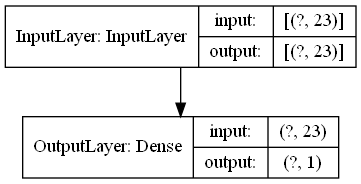

In [1280]:
plot_model(model_first, show_shapes=True, to_file='../keras_models/model_first.png', show_layer_names=True)

In [1281]:
model_first.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1282]:
model_first.fit(X_train, y_train, epochs=50)

Epoch 1/50
254/254 [==============================] - 0s 538us/step - loss: 0.7526 - accuracy: 0.5598
Epoch 2/50
254/254 [==============================] - 0s 460us/step - loss: 0.5494 - accuracy: 0.7448
Epoch 3/50
254/254 [==============================] - 0s 461us/step - loss: 0.4587 - accuracy: 0.8493

In [1283]:
_ , accuracy = model_first.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

64/64 [==============================] - 0s 453us/step - loss: 0.2387 - accuracy: 0.9092
Accuracy: 90.9181


## Эксперимент №2
* 1 скрытый слой (функция активации - sigmoid, 5 нейронов)
* Функция активации выходного слоя - relu
* 100 эпох обучения

In [1284]:
model_second = Sequential()
model_second.add(Input(23, name='InputLayer'))
model_second.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_second.add(Dense(1, activation='relu', name='OutputLayer'))

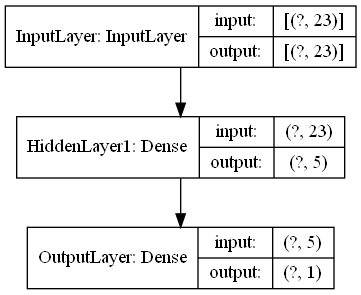

In [1285]:
plot_model(model_second, show_shapes=True, to_file='../keras_models/model_second.png', show_layer_names=True)

In [1286]:
model_second.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1287]:
model_second.fit(X_train, y_train, epochs=100)

Epoch 1/100
254/254 [==============================] - 0s 520us/step - loss: 1.1932 - accuracy: 0.8299
Epoch 2/100
254/254 [==============================] - 0s 543us/step - loss: 0.4444 - accuracy: 0.8329
Epoch 3/100
254/254 [==============================] - 0s 690us/step - loss: 0.3806 - accuracy: 0.8459

In [1288]:
_ , accuracy = model_second.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

64/64 [==============================] - 0s 446us/step - loss: 0.2533 - accuracy: 0.9102
Accuracy: 91.0168


## Эксперимент №3
* скрытый слоя (функция активации - sigmoid, 5 нейронов)
* скрытый слоя (функция активации - sigmoid, 3 нейронов)
* Функция активации выходного слоя - relu
* 150 эпох обучения

In [1305]:
model_third = Sequential()
model_third.add(Input(23, name='InputLayer'))
model_third.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_third.add(Dense(3, name='HiddenLayer2', activation='sigmoid'),)
model_third.add(Dense(1, activation='relu', name='OutputLayer'))

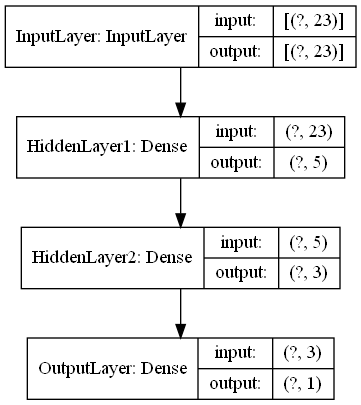

In [1306]:
plot_model(model_third, show_shapes=True, to_file='../keras_models/model_third.png', show_layer_names=True)

In [1307]:
model_third.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1308]:
model_third.fit(X_train, y_train, epochs=150)

Epoch 1/150
254/254 [==============================] - 0s 563us/step - loss: 0.4902 - accuracy: 0.7963
Epoch 2/150
254/254 [==============================] - 0s 620us/step - loss: 0.3784 - accuracy: 0.8393
Epoch 3/150
254/254 [==============================] - 0s 541us/step - loss: 0.3453 - accuracy: 0.8393

In [1309]:
_ , accuracy = model_third.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

64/64 [==============================] - 0s 437us/step - loss: 0.2178 - accuracy: 0.9235
Accuracy: 92.3495


## Эксперимент №4
* скрытый слоя (функция активации - sigmoid, 5 нейронов)
* скрытый слоя (функция активации - relu, 4 нейронов)
* скрытый слоя (функция активации - sigmoid, 3 нейрона)
* Функция активации выходного слоя - relu
* 300 эпох обучения

In [1294]:
model_fourth = Sequential()
model_fourth.add(Input(23, name='InputLayer'))
model_fourth.add(Dense(5, name='HiddenLayer1', activation='sigmoid'),)
model_fourth.add(Dense(4, name='HiddenLayer2', activation='relu'),)
model_fourth.add(Dense(3, name='HiddenLayer3', activation='sigmoid'),)
model_fourth.add(Dense(1, activation='relu', name='OutputLayer'))

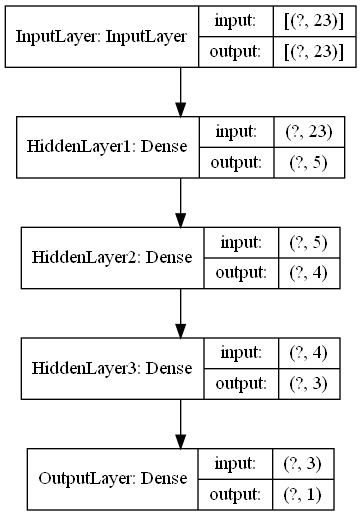

In [1295]:
plot_model(model_fourth, show_shapes=True, to_file='../keras_models/model_fourth.png', show_layer_names=True)

In [1296]:
model_fourth.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [1297]:
model_fourth.fit(X_train, y_train, epochs=300)

Epoch 1/300
254/254 [==============================] - 0s 575us/step - loss: 0.4262 - accuracy: 0.8393
Epoch 2/300
254/254 [==============================] - 0s 630us/step - loss: 0.3569 - accuracy: 0.8393
Epoch 3/300
254/254 [==============================] - 0s 669us/step - loss: 0.3160 - accuracy: 0.8404

In [1298]:
_ , accuracy = model_fourth.evaluate(X_test, y_test)
print('Accuracy: %.4f' % (accuracy*100))

64/64 [==============================] - 0s 422us/step - loss: 0.1617 - accuracy: 0.9408
Accuracy: 94.0770


## Выводы
* Лучшее качество обеспечивает модель 4 (эксперимент №4)
* Время на обучение нейронной сети прямо пропорционально количеству эпох обучения
* Увеличение количества эпох улучшает качество моделей, однако потенциально может
привести к переобучению модели
* Для достижения наилучших результатов работы сети требуется перебирать различные
варианты ее архитектуры, комбинировать слои с различным количеством нейронов и различными
функциями активации
* качество моделей на основе нейронных сетей превосходит
качество всех классических моделей, соответствует качеству модели
на основе дерева решений (DecisionTreeClassifier)
(допускаю, что при дальнейшем подборе параметров можно превзойти
качество дерева решений)

## Сохранение и загрузка модели

In [1299]:
model_fourth.save('../keras_models/model_fourth')

INFO:tensorflow:Assets written to: ../keras_models/model_fourth\assets


In [1300]:
model_fourth_reconstructed = load_model('../keras_models/model_fourth')

In [1301]:
print(model_fourth_reconstructed.summary())

Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HiddenLayer1 (Dense)         (None, 5)                 120       
_________________________________________________________________
HiddenLayer2 (Dense)         (None, 4)                 24        
_________________________________________________________________
HiddenLayer3 (Dense)         (None, 3)                 15        
_________________________________________________________________
OutputLayer (Dense)          (None, 1)                 4         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________
None
